<a href="https://colab.research.google.com/github/SauravDakre/MachineLearning/blob/master/supervised_learning/logistic_regression/attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from sklearn import metrics


# Import Dataset

In [62]:
attr = pd.read_csv('Attrition.csv')

In [63]:
attr.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5


# Handling Null Values
- no null value in dataset

In [64]:
attr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Encoding Categorical Data

In [65]:
le = LabelEncoder() 

In [66]:
attr_copy = attr.copy()
attr_copy.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5


In [67]:
for col in attr_copy:
  if attr_copy.dtypes[col] == 'object':
    attr_copy[col] = le.fit_transform(attr_copy[col])

In [68]:
attr_copy.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2


# Splitting in to test and train data

In [69]:
attr_copy.shape

(1470, 35)

In [70]:
attr_copy.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5


## rearrange columns move attrition in 1st position

In [71]:
columns = attr_copy.columns.tolist()
new_order = [columns[1], columns[0]] + columns[2:len(columns)]
print(new_order)

['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [72]:
attr_ordered = attr_copy.reindex(columns=new_order)
attr_ordered.head(1)

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5


In [73]:
attr_copy.head(1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5


## divide into x and y variables

In [74]:
attr_y = attr_ordered.iloc[:,0]
attr_x = attr_ordered.iloc[:,1:len(attr_ordered.columns)]
print(attr_y.shape)
print(attr_x.shape)

(1470,)
(1470, 34)


## split into train and test

In [75]:
attr_x_train, attr_x_test, attr_y_train, attr_y_test = train_test_split(attr_x, attr_y, test_size=0.2, random_state=555)

In [76]:
print("attr_x_train",attr_x_train.shape)
print("attr_x_test",attr_x_test.shape)
print("attr_y_train",attr_y_train.shape)
print("attr_y_test",attr_y_test.shape)

attr_x_train (1176, 34)
attr_x_test (294, 34)
attr_y_train (1176,)
attr_y_test (294,)


# Build Logistic Regression Model

In [77]:
lr = LogisticRegression()

In [78]:
lr.fit(attr_x_train, attr_y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
attr_pred = lr.predict(attr_x_test)

In [80]:
attr_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

## Build Confusion Matrix

In [81]:
confusion_matrix_table = confusion_matrix(attr_y_test, attr_pred)
confusion_matrix_table

array([[249,   2],
       [ 42,   1]])

In [82]:
def plotConfusionMatix(confusion_matrix_table):
  classes = ['No', 'Yes']
  # plot confusion matrix
  plt.imshow(confusion_matrix_table, interpolation='nearest', cmap=plt.cm.Greens)
  plt.title("Confusion Matrix")
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)

  thresh = confusion_matrix_table.max() / 2.
  for i, j in itertools.product(range(confusion_matrix_table.shape[0]), range(confusion_matrix_table.shape[1])):
      plt.text(j, i, confusion_matrix_table[i, j],
              horizontalalignment="center",
              color="white" if confusion_matrix_table[i, j] > thresh else "black")
      
  plt.tight_layout()

  plt.ylabel('True label')
  plt.xlabel('Predicted label')


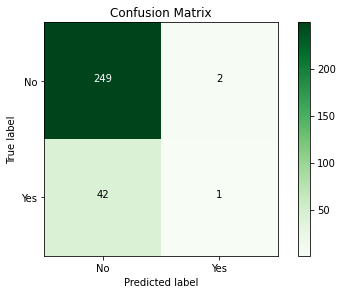

In [83]:
plotConfusionMatix(confusion_matrix_table)

from above chart the model has predicted that attrition value was **No** 42 times when the attrition value was actually **Yes**

# Solve class imbalance problem

In [84]:
x = pd.concat([attr_x_train, attr_y_train], axis=1)
print(x.shape)
x.head(1)

(1176, 35)


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
254,29,2,1247,2,20,2,2,1,349,4,1,45,3,2,7,4,0,6931,10732,2,0,0,14,3,4,80,1,10,2,3,3,2,0,2,0


In [85]:
attr_yes = x[x.Attrition == 1]
attr_no = x[x.Attrition == 0]
print(attr_yes.shape, attr_no.shape)

(194, 35) (982, 35)


In [86]:
attr_yes_upsampled = resample(attr_yes, 
                              replace = True, # sample with replacement
                              n_samples=len(attr_no), # match no. with majority
                              random_state=23) # reproducible result

In [87]:
attr_train_upsampled = pd.concat([attr_no, attr_yes_upsampled])

In [88]:
attr_train_upsampled.Attrition.value_counts()

1    982
0    982
Name: Attrition, dtype: int64

In [89]:
attr_train_upsampled.head(1)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
254,29,2,1247,2,20,2,2,1,349,4,1,45,3,2,7,4,0,6931,10732,2,0,0,14,3,4,80,1,10,2,3,3,2,0,2,0


In [90]:
attr_x_train_upsampled = attr_train_upsampled.iloc[:,0:(len(attr_train_upsampled.columns)-1)]
attr_y_train_upsampled = attr_train_upsampled.iloc[:,(len(attr_train_upsampled.columns)-1)]

In [91]:
attr_x_train_upsampled.head(1)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
254,29,2,1247,2,20,2,2,1,349,4,1,45,3,2,7,4,0,6931,10732,2,0,0,14,3,4,80,1,10,2,3,3,2,0,2


In [92]:
attr_y_train_upsampled.head(1)

254    0
Name: Attrition, dtype: int64

# Rebuild model

In [93]:
lr.fit(attr_x_train_upsampled, attr_y_train_upsampled)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
attr_pred_upsampled = lr.predict(attr_x_test)

In [95]:
confusion_matrix_table_upsampled = confusion_matrix(attr_y_test, attr_pred_upsampled)
confusion_matrix_table_upsampled

array([[141, 110],
       [ 14,  29]])

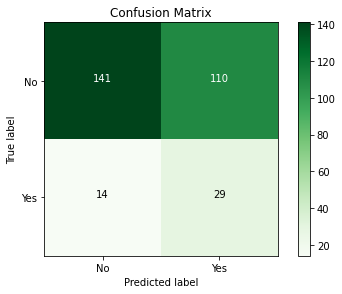

In [96]:
plotConfusionMatix(confusion_matrix_table_upsampled)

# Measuring Performance

In [97]:
metrics.accuracy_score(attr_y_test, attr_pred_upsampled)

0.5782312925170068

In [98]:
metrics.f1_score(attr_y_test, attr_pred_upsampled)

0.31868131868131866

In [99]:
metrics.recall_score(attr_y_test, attr_pred_upsampled)

0.6744186046511628

In [100]:
metrics.roc_auc_score(attr_y_test, attr_pred_upsampled)

0.6180857963494857

In [101]:
attr_prob = lr.predict_proba(attr_x_test)
pred_prob = pd.DataFrame(attr_prob)
pred_prob.head(2)

,0,1
0,0.541723,0.458277
1,0.601804,0.398196


In [102]:
fpr, tpr, threshold = metrics.roc_curve(attr_y_test, pred_prob.iloc[:,1])

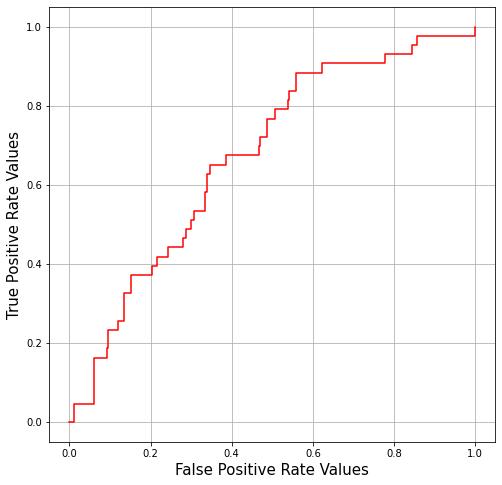

In [103]:
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='r')
plt.xlabel("False Positive Rate Values", size=15)
plt.ylabel("True Positive Rate Values", size=15)
plt.grid()